In [8]:
# ============================== loading libraries ===========================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import cross_validation

from sklearn import datasets, neighbors
from sklearn.model_selection import TimeSeriesSplit
import pickle
import scipy
import time
# =============================================================================================

In [9]:
#Function to pickle in an object.
def openPickleFile(name): #name = the pickle file name, this should be passed as a string inside " ".
    global temp
    temp = pickle.load(open(name + ".pickle","rb"))
    return temp

In [10]:
openPickleFile("y_train")
y_train = temp
print(y_train.shape)
print(y_train.dtype)

(33334,)
object


In [11]:
y_train[y_train == 'positive'] = 1
y_train[y_train == 'negative'] = 0
y_train = y_train.astype(float)
print(y_train.dtype)

float64


In [12]:
openPickleFile("y_test")
y_test = temp
print(y_test.shape)
print(y_test.dtype)

(16666,)
object


In [13]:
y_test[y_test == 'positive'] = 1
y_test[y_test == 'negative'] = 0
y_test = y_test.astype(float)
print(y_test.dtype)

float64


In [14]:
#Function to count no. of unique values in variable of any datatype.
def unique_count(a):
    unique, inverse = np.unique(a, return_inverse=True)
    count = np.zeros(len(unique), np.int)
    np.add.at(count, inverse, 1)
    return np.vstack(( unique, count)).T

# Dataset splitting strategies:

1. Time based splitting:-

In [9]:
#Splitting data to Train and test based on time. Here the dataset is split to Train and test, with k-folds alloted to Train
#and the (k+1)th fold alloted to Test. k= no. of splits.
def timeBasedSplit(X,y,splits):
    tscv = TimeSeriesSplit(n_splits=splits)
    print(tscv)
    global X_train, X_test, y_train, y_test
    for train_index, test_index in tscv.split(X):
       print("TRAIN:", train_index, "TEST:", test_index)
       X_train, X_test = X[train_index], X[test_index]
       y_train, y_test = y[train_index], y[test_index]

timeBasedSplit(tsne_data_unigram,labels_20k_float,splits=3)

TimeSeriesSplit(max_train_size=None, n_splits=3)
TRAIN: [   0    1    2 ... 4997 4998 4999] TEST: [5000 5001 5002 ... 9997 9998 9999]
TRAIN: [   0    1    2 ... 9997 9998 9999] TEST: [10000 10001 10002 ... 14997 14998 14999]
TRAIN: [    0     1     2 ... 14997 14998 14999] TEST: [15000 15001 15002 ... 19997 19998 19999]


#  CV using kd_tree algorithm.

# 1. CV on Standardized data for Unigrams

### Simple Cross Validation 

In [15]:
openPickleFile("X_train_BOW_unigram")
X_train = temp
print(X_train.shape)
print(X_train.dtype)

(33334, 50)
float64


In [16]:
openPickleFile("X_test_BOW_unigram")
X_test = temp
print(X_test.shape)
print(X_test.dtype)

(16666, 50)
float64


In [17]:
def unique(a):
    unique, counts = np.unique(a, return_counts=True)
    return np.asarray((unique, counts)).T

unique(y_test)

array([[0.000e+00, 8.440e+02],
       [1.000e+00, 4.156e+03]])

In [17]:
# split the train data set into cross validation train and cross validation test
time_start = time.time()

X_tr, X_cv, y_tr, y_cv = cross_validation.train_test_split(X_train, y_train, test_size=0.3)

for i in range(1,30,2):
    # instantiate learning model (k = 30)
    knn = KNeighborsClassifier(n_neighbors=i, algorithm='kd_tree', n_jobs = 6)

    # fitting the model on crossvalidation train
    knn.fit(X_tr, y_tr)

    # predict the response on the crossvalidation train
    pred = knn.predict(X_cv)

    # evaluate CV accuracy
    acc = accuracy_score(y_cv, pred, normalize=True) * float(100)
    print('\nCV accuracy for k = %d is %d%%' % (i, acc))
    
knn = KNeighborsClassifier(1)
knn.fit(X_tr,y_tr)
pred = knn.predict(X_test)
acc = accuracy_score(y_test, pred, normalize=True) * float(100)
print('\n****Test accuracy for k = 1 is %d%%' % (acc))

print ('CV for k in range(1,30,2) done! Time elapsed: {} seconds'.format(time.time()-time_start))


CV accuracy for k = 1 is 78%

CV accuracy for k = 3 is 82%

CV accuracy for k = 5 is 83%

CV accuracy for k = 7 is 84%

CV accuracy for k = 9 is 84%

CV accuracy for k = 11 is 85%

CV accuracy for k = 13 is 85%

CV accuracy for k = 15 is 85%

CV accuracy for k = 17 is 85%

CV accuracy for k = 19 is 85%

CV accuracy for k = 21 is 85%

CV accuracy for k = 23 is 85%

CV accuracy for k = 25 is 85%

CV accuracy for k = 27 is 85%

CV accuracy for k = 29 is 85%

****Test accuracy for k = 1 is 71%
CV for k in range(1,30,2) done! Time elapsed: 191.60425472259521 seconds


### 10 fold cross validation 


The optimal number of neighbors is 37.


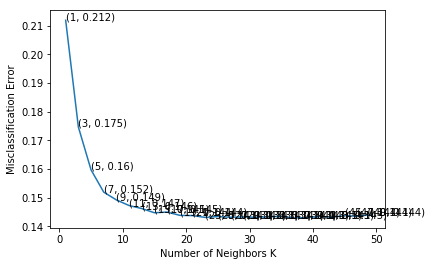

the misclassification error for each k value is :  [0.212 0.175 0.16  0.152 0.149 0.147 0.146 0.145 0.145 0.144 0.144 0.143
 0.143 0.143 0.143 0.143 0.143 0.143 0.143 0.143 0.143 0.143 0.144 0.144
 0.144]


In [18]:


# creating odd list of K for KNN
myList = list(range(0,50))
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, algorithm='kd_tree', n_jobs = 6)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)

# plot misclassification error vs k 
plt.plot(neighbors, MSE)

for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each k value is : ", np.round(MSE,3))

In [19]:
# ============================== KNN with k = optimal_k ===============================================
# instantiate learning model k = optimal_k
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k, algorithm='kd_tree', n_jobs = 6)

# fitting the model
knn_optimal.fit(X_train, y_train)

# predict the response
pred = knn_optimal.predict(X_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))


The accuracy of the knn classifier for k = 37 is 81.987279%


# 2. CV on Standardized data for Bigrams

In [20]:
openPickleFile("X_train_BOW_bigrams")
X_train = temp
print(X_train.shape)
print(X_train.dtype)

(33334, 50)
float64


In [21]:
openPickleFile("X_test_BOW_bigrams")
X_test = temp
print(X_test.shape)
print(X_test.dtype)

(16666, 50)
float64


In [22]:
# split the train data set into cross validation train and cross validation test
time_start = time.time()

X_tr, X_cv, y_tr, y_cv = cross_validation.train_test_split(X_train, y_train, test_size=0.3)

for i in range(1,30,2):
    # instantiate learning model (k = 30)
    knn = KNeighborsClassifier(n_neighbors=i, algorithm='kd_tree', n_jobs = 6)

    # fitting the model on crossvalidation train
    knn.fit(X_tr, y_tr)

    # predict the response on the crossvalidation train
    pred = knn.predict(X_cv)

    # evaluate CV accuracy
    acc = accuracy_score(y_cv, pred, normalize=True) * float(100)
    print('\nCV accuracy for k = %d is %d%%' % (i, acc))
    
knn = KNeighborsClassifier(1)
knn.fit(X_tr,y_tr)
pred = knn.predict(X_test)
acc = accuracy_score(y_test, pred, normalize=True) * float(100)
print('\n****Test accuracy for k = 1 is %d%%' % (acc))

print ('CV for k in range(1,30,2) done! Time elapsed: {} seconds'.format(time.time()-time_start))


CV accuracy for k = 1 is 79%

CV accuracy for k = 3 is 83%

CV accuracy for k = 5 is 84%

CV accuracy for k = 7 is 85%

CV accuracy for k = 9 is 85%

CV accuracy for k = 11 is 85%

CV accuracy for k = 13 is 85%

CV accuracy for k = 15 is 85%

CV accuracy for k = 17 is 85%

CV accuracy for k = 19 is 85%

CV accuracy for k = 21 is 85%

CV accuracy for k = 23 is 85%

CV accuracy for k = 25 is 85%

CV accuracy for k = 27 is 85%

CV accuracy for k = 29 is 85%

****Test accuracy for k = 1 is 72%
CV for k in range(1,30,2) done! Time elapsed: 193.7396240234375 seconds


### 10 fold cross validation 


The optimal number of neighbors is 23.


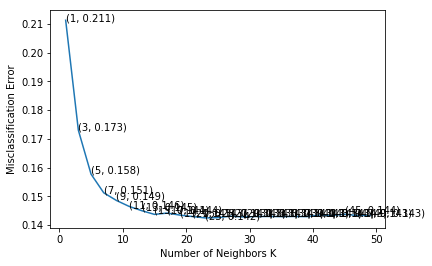

the misclassification error for each k value is :  [0.211 0.173 0.158 0.151 0.149 0.146 0.145 0.144 0.144 0.143 0.143 0.142
 0.143 0.143 0.143 0.143 0.143 0.143 0.143 0.143 0.143 0.143 0.144 0.143
 0.143]
 10-fold CV for k in range(1,50,2) done! Time elapsed: 991.4597065448761 seconds


In [23]:
time_start = time.time()

# creating odd list of K for KNN
myList = list(range(0,50))
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, algorithm='kd_tree', n_jobs = 6)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)

# plot misclassification error vs k 
plt.plot(neighbors, MSE)

for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each k value is : ", np.round(MSE,3))

print (' 10-fold CV for k in range(1,50,2) done! Time elapsed: {} seconds'.format(time.time()-time_start))

In [24]:
# ============================== KNN with k = optimal_k ===============================================
# instantiate learning model k = optimal_k
time_start = time.time()

knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k, algorithm='kd_tree', n_jobs = 6)

# fitting the model
knn_optimal.fit(X_train, y_train)

# predict the response
pred = knn_optimal.predict(X_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))

print (' CV for optimal k on Test data done! Time elapsed: {} seconds'.format(time.time()-time_start))


The accuracy of the knn classifier for k = 23 is 81.747270%
 CV for optimal k on Test data done! Time elapsed: 25.197612762451172 seconds


# 3. CV on Standardized data for TF IDF

In [25]:
openPickleFile("X_train_tf_idf")
X_train = temp
print(X_train.shape)
print(X_train.dtype)

(33334, 50)
float64


In [26]:
openPickleFile("X_test_tf_idf")
X_test = temp
print(X_test.shape)
print(X_test.dtype)

(16666, 50)
float64


In [27]:
# split the train data set into cross validation train and cross validation test
time_start = time.time()

X_tr, X_cv, y_tr, y_cv = cross_validation.train_test_split(X_train, y_train, test_size=0.3)

for i in range(1,30,2):
    # instantiate learning model (k = 30)
    knn = KNeighborsClassifier(n_neighbors=i, algorithm='kd_tree', n_jobs = 6)

    # fitting the model on crossvalidation train
    knn.fit(X_tr, y_tr)

    # predict the response on the crossvalidation train
    pred = knn.predict(X_cv)

    # evaluate CV accuracy
    acc = accuracy_score(y_cv, pred, normalize=True) * float(100)
    print('\nCV accuracy for k = %d is %d%%' % (i, acc))
    
knn = KNeighborsClassifier(1)
knn.fit(X_tr,y_tr)
pred = knn.predict(X_test)
acc = accuracy_score(y_test, pred, normalize=True) * float(100)
print('\n****Test accuracy for k = 1 is %d%%' % (acc))

print ('CV for k in range(1,30,2) done! Time elapsed: {} seconds'.format(time.time()-time_start))


CV accuracy for k = 1 is 78%

CV accuracy for k = 3 is 83%

CV accuracy for k = 5 is 84%

CV accuracy for k = 7 is 85%

CV accuracy for k = 9 is 86%

CV accuracy for k = 11 is 86%

CV accuracy for k = 13 is 86%

CV accuracy for k = 15 is 86%

CV accuracy for k = 17 is 86%

CV accuracy for k = 19 is 86%

CV accuracy for k = 21 is 86%

CV accuracy for k = 23 is 86%

CV accuracy for k = 25 is 86%

CV accuracy for k = 27 is 86%

CV accuracy for k = 29 is 86%

****Test accuracy for k = 1 is 73%
CV for k in range(1,30,2) done! Time elapsed: 195.3687767982483 seconds


### 10 fold cross validation 


The optimal number of neighbors is 23.


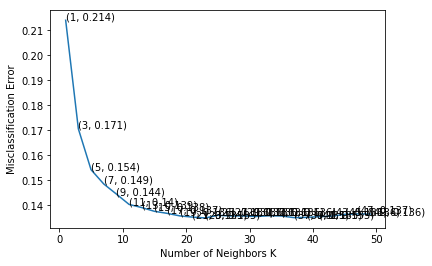

the misclassification error for each k value is :  [0.214 0.171 0.154 0.149 0.144 0.14  0.139 0.138 0.137 0.136 0.135 0.135
 0.136 0.136 0.136 0.136 0.136 0.136 0.135 0.135 0.135 0.136 0.136 0.137
 0.136]
 10-fold CV for k in range(1,50,2) done! Time elapsed: 1010.0943915843964 seconds


In [28]:
time_start = time.time()

# creating odd list of K for KNN
myList = list(range(0,50))
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, algorithm='kd_tree', n_jobs = 6)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)

# plot misclassification error vs k 
plt.plot(neighbors, MSE)

for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each k value is : ", np.round(MSE,3))

print (' 10-fold CV for k in range(1,50,2) done! Time elapsed: {} seconds'.format(time.time()-time_start))

In [29]:
# ============================== KNN with k = optimal_k ===============================================
# instantiate learning model k = optimal_k
time_start = time.time()

knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k, algorithm='kd_tree', n_jobs = 6)

# fitting the model
knn_optimal.fit(X_train, y_train)

# predict the response
pred = knn_optimal.predict(X_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))

print (' CV for optimal k on Test data done! Time elapsed: {} seconds'.format(time.time()-time_start))


The accuracy of the knn classifier for k = 23 is 81.915277%
 CV for optimal k on Test data done! Time elapsed: 26.98582887649536 seconds


# 4. CV on Standardized data for Avg w2v

In [30]:
openPickleFile("X_train_sent_vectors")
X_train = temp
print(X_train.shape)
print(X_train.dtype)

(33334, 50)
float64


In [31]:
openPickleFile("X_test_sent_vectors_array")
X_test = temp
print(X_test.shape)
print(X_test.dtype)

(16666, 50)
float64


In [32]:
# split the train data set into cross validation train and cross validation test
time_start = time.time()

X_tr, X_cv, y_tr, y_cv = cross_validation.train_test_split(X_train, y_train, test_size=0.3)

for i in range(1,30,2):
    # instantiate learning model (k = 30)
    knn = KNeighborsClassifier(n_neighbors=i, algorithm='kd_tree', n_jobs = 6)

    # fitting the model on crossvalidation train
    knn.fit(X_tr, y_tr)

    # predict the response on the crossvalidation train
    pred = knn.predict(X_cv)

    # evaluate CV accuracy
    acc = accuracy_score(y_cv, pred, normalize=True) * float(100)
    print('\nCV accuracy for k = %d is %d%%' % (i, acc))
    
knn = KNeighborsClassifier(1)
knn.fit(X_tr,y_tr)
pred = knn.predict(X_test)
acc = accuracy_score(y_test, pred, normalize=True) * float(100)
print('\n****Test accuracy for k = 1 is %d%%' % (acc))

print ('CV for k in range(1,30,2) done! Time elapsed: {} seconds'.format(time.time()-time_start))


CV accuracy for k = 1 is 82%

CV accuracy for k = 3 is 85%

CV accuracy for k = 5 is 86%

CV accuracy for k = 7 is 86%

CV accuracy for k = 9 is 86%

CV accuracy for k = 11 is 86%

CV accuracy for k = 13 is 87%

CV accuracy for k = 15 is 87%

CV accuracy for k = 17 is 87%

CV accuracy for k = 19 is 87%

CV accuracy for k = 21 is 87%

CV accuracy for k = 23 is 87%

CV accuracy for k = 25 is 86%

CV accuracy for k = 27 is 87%

CV accuracy for k = 29 is 86%

****Test accuracy for k = 1 is 72%
CV for k in range(1,30,2) done! Time elapsed: 203.44471192359924 seconds


### 10 fold cross validation 


The optimal number of neighbors is 13.


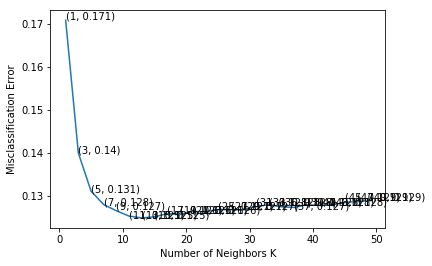

the misclassification error for each k value is :  [0.171 0.14  0.131 0.128 0.127 0.125 0.125 0.125 0.126 0.126 0.126 0.126
 0.127 0.127 0.127 0.128 0.128 0.128 0.127 0.128 0.128 0.128 0.129 0.129
 0.129]
 10-fold CV for k in range(1,50,2) done! Time elapsed: 1057.9436614513397 seconds


In [33]:
time_start = time.time()

# creating odd list of K for KNN
myList = list(range(0,50))
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, algorithm='kd_tree', n_jobs = 6)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)

# plot misclassification error vs k 
plt.plot(neighbors, MSE)

for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each k value is : ", np.round(MSE,3))

print (' 10-fold CV for k in range(1,50,2) done! Time elapsed: {} seconds'.format(time.time()-time_start))

In [34]:
# ============================== KNN with k = optimal_k ===============================================
# instantiate learning model k = optimal_k
time_start = time.time()

knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k, algorithm='kd_tree', n_jobs = 6)

# fitting the model
knn_optimal.fit(X_train, y_train)

# predict the response
pred = knn_optimal.predict(X_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))

print (' CV for optimal k on Test data done! Time elapsed: {} seconds'.format(time.time()-time_start))


The accuracy of the knn classifier for k = 13 is 80.451218%
 CV for optimal k on Test data done! Time elapsed: 26.140099048614502 seconds


# 6. CV on TSNE data for TFIDF Avg w2v

In [35]:
openPickleFile("X_train_tfidf_sent_vectors")
X_train = temp
print(X_train.shape)
print(X_train.dtype)

(33334, 50)
float64


In [36]:
openPickleFile("X_test_tfidf_sent_vectors_array")
X_test = temp
print(X_test.shape)
print(X_test.dtype)

(16666, 50)
float64


In [37]:
# split the train data set into cross validation train and cross validation test
time_start = time.time()

X_tr, X_cv, y_tr, y_cv = cross_validation.train_test_split(X_train, y_train, test_size=0.3)

for i in range(1,30,2):
    # instantiate learning model (k = 30)
    knn = KNeighborsClassifier(n_neighbors=i, algorithm='kd_tree', n_jobs = 6)

    # fitting the model on crossvalidation train
    knn.fit(X_tr, y_tr)

    # predict the response on the crossvalidation train
    pred = knn.predict(X_cv)

    # evaluate CV accuracy
    acc = accuracy_score(y_cv, pred, normalize=True) * float(100)
    print('\nCV accuracy for k = %d is %d%%' % (i, acc))
    
knn = KNeighborsClassifier(1)
knn.fit(X_tr,y_tr)
pred = knn.predict(X_test)
acc = accuracy_score(y_test, pred, normalize=True) * float(100)
print('\n****Test accuracy for k = 1 is %d%%' % (acc))

print ('CV for k in range(1,30,2) done! Time elapsed: {} seconds'.format(time.time()-time_start))


CV accuracy for k = 1 is 80%

CV accuracy for k = 3 is 84%

CV accuracy for k = 5 is 86%

CV accuracy for k = 7 is 86%

CV accuracy for k = 9 is 86%

CV accuracy for k = 11 is 86%

CV accuracy for k = 13 is 86%

CV accuracy for k = 15 is 86%

CV accuracy for k = 17 is 86%

CV accuracy for k = 19 is 86%

CV accuracy for k = 21 is 86%

CV accuracy for k = 23 is 86%

CV accuracy for k = 25 is 86%

CV accuracy for k = 27 is 86%

CV accuracy for k = 29 is 86%

****Test accuracy for k = 1 is 71%
CV for k in range(1,30,2) done! Time elapsed: 190.40722560882568 seconds


### 10 fold cross validation 


The optimal number of neighbors is 19.


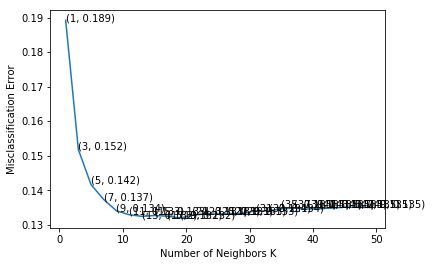

the misclassification error for each k value is :  [0.189 0.152 0.142 0.137 0.134 0.133 0.132 0.133 0.132 0.132 0.133 0.133
 0.133 0.133 0.133 0.134 0.134 0.135 0.135 0.135 0.135 0.135 0.135 0.135
 0.135]
 10-fold CV for k in range(1,50,2) done! Time elapsed: 898.2963585853577 seconds


In [38]:
time_start = time.time()

# creating odd list of K for KNN
myList = list(range(0,50))
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, algorithm='kd_tree', n_jobs = 6)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)

# plot misclassification error vs k 
plt.plot(neighbors, MSE)

for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each k value is : ", np.round(MSE,3))

print (' 10-fold CV for k in range(1,50,2) done! Time elapsed: {} seconds'.format(time.time()-time_start))

In [39]:
# ============================== KNN with k = optimal_k ===============================================
# instantiate learning model k = optimal_k
time_start = time.time()

knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k, algorithm='kd_tree', n_jobs = 6)

# fitting the model
knn_optimal.fit(X_train, y_train)

# predict the response
pred = knn_optimal.predict(X_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))

print (' CV for optimal k on Test data done! Time elapsed: {} seconds'.format(time.time()-time_start))


The accuracy of the knn classifier for k = 19 is 81.723269%
 CV for optimal k on Test data done! Time elapsed: 25.183132886886597 seconds
